In [1]:
# Import necessary libraries
from dataframe_utils import * # this imports all the functions from our dataframe_utils including all the imports
from plotting_utils import * # this imports all the functions from our plotting_utils
%load_ext autoreload
%autoreload 2

In [2]:
os.getcwd()
# this is a windows command

'p:\\Anaysis\\Light-dark\\Analysis\\code'

### The inputs: 

In [3]:
#Dictionary of run name and the starting dpf for each run
experiment_date = 'All'
period_number = 24
#change the colors dictionary to fit the number of periods for plotting
colors = {1: 'gray',
          2: 'gray',
          3: 'gray',
          4: 'gray',
          5: 'gray',
          6: 'gray', 
          7: 'gray', 
          8: 'lightblue', 
          9: 'lightblue',
          10: 'lightblue',
          11: 'lightblue',
          12: 'lightblue',
          13: 'lightblue',
          14: 'lightblue', 
          15: 'lightblue', 
          16: 'lightblue',
          17: 'lightblue',
          18: 'lightblue',
          19: 'lightblue',
          20: 'gray',
          21: 'gray',
          22: 'gray', 
          23: 'gray', 
          24: 'gray'}

runs = '20230417_oldbox', '20230514_topbox', '20230514_bottombox', '20230529_topbox', '20230529_bottombox', '20230622_topbox'
    


In [4]:
os.getcwd()

'p:\\Anaysis\\Light-dark\\Analysis\\code'

In [5]:
dfs = {}

for run_name in runs:
    file_list = glob(f'../results/data/{run_name}_argos_24periods_preference_table_*.csv')
    print(f"Files found for {run_name}: {file_list}")  # Print the file paths for debugging
    if file_list:
        df = file_list[-1]
        df = pd.read_csv(df)
        df['run'] = run_name
        dfs[run_name] = df
    else:
        print(f"No CSV file found for run: {run_name}")


Files found for 20230417_oldbox: ['../results/data\\20230417_oldbox_argos_24periods_preference_table_20230718_192000.csv']
Files found for 20230514_topbox: ['../results/data\\20230514_topbox_argos_24periods_preference_table_20230718_192443.csv']
Files found for 20230514_bottombox: ['../results/data\\20230514_bottombox_argos_24periods_preference_table_20230718_192352.csv']
Files found for 20230529_topbox: ['../results/data\\20230529_topbox_argos_24periods_preference_table_20230718_193059.csv']
Files found for 20230529_bottombox: ['../results/data\\20230529_bottombox_argos_24periods_preference_table_20230718_192944.csv']
Files found for 20230622_topbox: ['../results/data\\20230622_topbox_argos_24periods_preference_table_20230718_193339.csv']


In [6]:
# Assuming you want to view the DataFrame for the run '20230427_oldbox'
run_to_view = '20230417_oldbox'
if run_to_view in dfs:
    df_to_view = dfs[run_to_view]

df_to_view.head(10)

,dpf,day_period,dark_one,light_one,outside,total,percentage,run
0,6,14,903,347,0,1250,72.240000,20230417_oldbox
1,6,15,1330,561,0,1891,70.333157,20230417_oldbox
2,6,16,1230,531,0,1761,69.846678,20230417_oldbox
3,6,17,1432,441,0,1873,76.454885,20230417_oldbox
4,6,18,1650,276,2,1926,85.669782,20230417_oldbox
5,6,19,1517,280,1,1797,84.418475,20230417_oldbox
6,6,20,1694,176,0,1870,90.588235,20230417_oldbox
7,6,21,1631,44,0,1675,97.373134,20230417_oldbox
8,6,22,1746,16,1,1762,99.091941,20230417_oldbox
9,6,23,1771,72,1,1843,96.093326,20230417_oldbox


In [6]:
# Create an empty DataFrame to store the combined data
one_df = pd.DataFrame()

# Append each DataFrame from the 'dfs' dictionary to the 'super_df'
for df in dfs.values():
    one_df = one_df.append(df, ignore_index=True)



### Patterns of preference over time

In [7]:
# Create an empty dictionary to store the means and standard deviations for each 'dpf' and 'day_period' combination
dpf_day_period_stats = {}

# Group the DataFrame by 'dpf' and 'day_period'
grouped = one_df.groupby(['dpf', 'day_period'])

# Loop through each 'dpf' and 'day_period' combination and calculate the mean and standard error
for (dpf, day_period), group in grouped:
    dpf_day_period_mean = group['percentage'].mean()
    dpf_day_period_sem = group['percentage'].sem()
    dpf_day_period_stats[(dpf, day_period)] = {'mean': dpf_day_period_mean, 'sem': dpf_day_period_sem}

In [19]:
# To only include data from day 7-10
# Filter the dictionary to include only tuples where the first value is 7, 8, 9, or 10
filtered_dict = {key: value for key, value in dpf_day_period_stats.items() if key[0] in (7, 8, 9, 10)}
x_labels = [key[0] for key in filtered_dict.keys()]

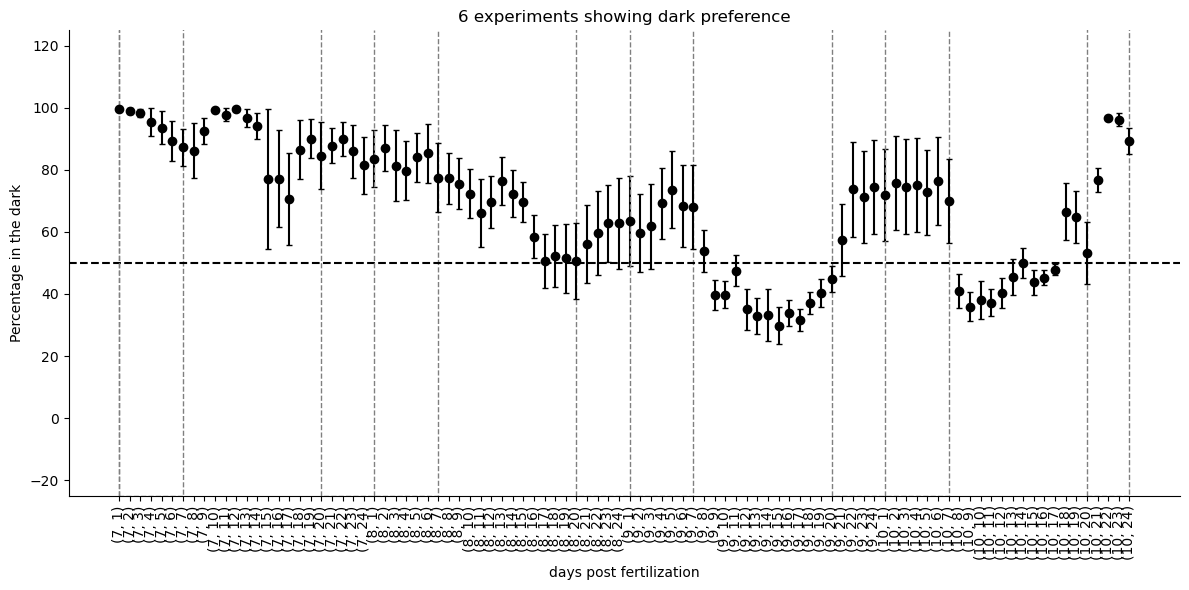

Figure saved to: /zstorage/hera/Light_dark/Analysis/results/plots/All_scatter_dashed_dpf_20231208_151500.pdf


In [59]:
#Final figure for paper
lines=[(7,1),(8,1),(9,1),(10,1)]
timestamp_now = dt.datetime.now().strftime("%Y%m%d_%H%M%S")
figure_path = f'../results/plots/{experiment_date}_scatter_dashed_dpf_{timestamp_now}.pdf'

# Extract keys and corresponding means and standard deviations
keys = list(filtered_dict.keys())
mean_values = [entry['mean'] for entry in filtered_dict.values()]
ssem_dev_values = [entry['sem'] for entry in filtered_dict.values()]
nights= [key for key in filtered_dict.keys() if (0 <= key[1] <= 7) or (20 <= key[1] <= 24)]
night_starts= [(7,1),(7, 20),(8, 20),(9,20),(10,20)]
night_ends= [(7,7),(8,7),(9,7),(10,7),(10,24)]

# Prepare the plot
plt.figure(figsize=(12, 6))
plt.errorbar(range(len(keys)), mean_values, yerr=ssem_dev_values, fmt='o', color='black', capsize=2)
plt.xticks(range(len(keys)), keys, rotation=90)
plt.ylim(-25,125)
plt.xlabel('days post fertilization')
plt.ylabel('Percentage in the dark')
plt.title('6 experiments showing dark preference')
plt.tight_layout()

ax = plt.gca()

# Add a horizontal line at y=50
plt.axhline(y=50, color='Black', linestyle='--', linewidth=1.5)

# Add vertical dashed lines for each x-value
for line in lines:
    x_value = keys.index(line)
    plt.axvline(x=x_value, color='grey', linestyle='--', linewidth=1)

for night_start,night_end in zip(night_starts,night_ends):
    x_start = keys.index(night_start)
    x_stop = keys.index(night_end)
    plt.axvspan(x_start, x_stop, ymin=0, ymax=5, alpha=.5, facecolor='white', edgecolor='black', lw=1, linestyle='dashed')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the figure
plt.savefig(figure_path)

# Show the plot
plt.show()

print('Figure saved to:', os.path.abspath(figure_path))

### Bar plots and stats tests

In [13]:
# Define a function to map day_period values to day or night
def map_day_night(day_period):
    if 8 <= day_period <= 19:
        return 'day'
    else:
        return 'night'

# Apply the function to the 'day_period' column to create the 'day_night' column
one_df['day_night'] = one_df['day_period'].apply(map_day_night)

#### pre vs post emergence

In [14]:
# Filter the preemergence data
preemergence_subset = one_df[(one_df['dpf'].isin([7, 8])) & (one_df['day_night'] == 'day')]
preemergence_aveperc_by_run = preemergence_subset.groupby('run')['percentage'].mean().reset_index()
preemergence_aveperc_by_run.columns = ['run', 'preemergence_perc_ave']

# Filter the postemergence data
postemergence_subset = one_df[(one_df['dpf'].isin([9, 10])) & (one_df['day_night'] == 'day')]
postemergence_aveperc_by_run = postemergence_subset.groupby('run')['percentage'].mean().reset_index()
postemergence_aveperc_by_run.columns = ['run', 'post_emergence_perc_ave']

# Merge the two DataFrames on the 'run' column
merged_df = pd.merge(preemergence_aveperc_by_run, postemergence_aveperc_by_run, on='run', how='outer')

# Display the merged DataFrame
print(merged_df)

                  run  preemergence_perc_ave  post_emergence_perc_ave
0     20230417_oldbox              59.105385                32.972076
1  20230514_bottombox              61.442666                35.944122
2     20230514_topbox              80.095347                35.180035
3  20230529_bottombox              76.293404                40.323044
4     20230529_topbox              90.943616                56.083182
5     20230622_topbox              82.372763                43.304667


In [15]:
mean_preemergence_percentage = merged_df['preemergence_perc_ave'].mean()
mean_postemergence_percentage = merged_df['post_emergence_perc_ave'].mean()


In [20]:
print(data)

[0    59.105385
1    61.442666
2    80.095347
3    76.293404
4    90.943616
5    82.372763
Name: preemergence_perc_ave, dtype: float64, 0    32.972076
1    35.944122
2    35.180035
3    40.323044
4    56.083182
5    43.304667
Name: post_emergence_perc_ave, dtype: float64]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


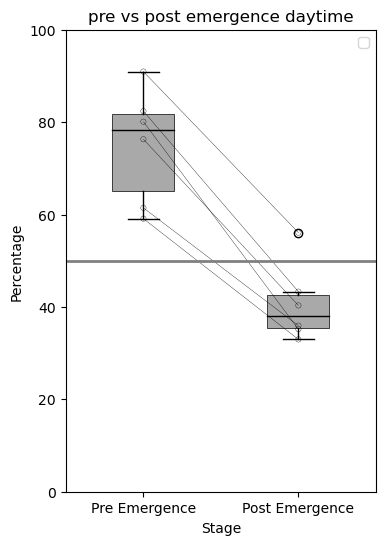

Figure saved to: /zstorage/hera/Light_dark/Analysis/results/plots/All_pre_vs_post_emergence_20231208_151156.pdf


In [57]:
# Box plot vibes
# Generate a timestamp for the figure path & Set up the figure path
timestamp_now = dt.datetime.now().strftime("%Y%m%d_%H%M%S")
figure_path = f'../results/plots/{experiment_date}_pre_vs_post_emergence_{timestamp_now}.pdf'

# Create data for boxplot
data = [merged_df['preemergence_perc_ave'], merged_df['post_emergence_perc_ave']]

# Set custom colors for boxes and median lines
boxprops = dict(facecolor='#A9A9A9', color='black', linewidth=0.5)
medianprops = dict(color='black', linewidth=1)

# Set the figure size to make it narrower
plt.figure(figsize=(4, 6))

# Plotting the boxplot with custom colors
bp = plt.boxplot(data, labels=['Pre Emergence', 'Post Emergence'], patch_artist=True, 
                 boxprops=boxprops, medianprops=medianprops, widths=0.4)

# Plotting the data points for each run on top of the box plot
for index, row in merged_df.iterrows():
    x_values = [1, 2]  # x-coordinates for the scatter plot
    y_values = [row['preemergence_perc_ave'], row['post_emergence_perc_ave']]  # y-coordinates for the scatter plot

    # Plotting the data points
    plt.scatter(x_values, y_values, facecolors='none', edgecolors='black',linewidth=0.25, s=15, zorder=2)

    # Connect the scatter dot pairs from the same run with lines
    plt.plot(x_values, y_values, c='black', linestyle='-', linewidth=0.25, zorder=2)

# # Calculate means and plot a dot
# means = [merged_df['preemergence_perc_ave'].mean(), merged_df['post_emergence_perc_ave'].mean()]
# plt.plot([1, 2], means, marker='o', color='red', linestyle='-', linewidth=0, markersize=2, label='Mean')

# Add a horizontal line at y=50
plt.axhline(y=50, color='Gray', linestyle='-', linewidth=2)

# Set labels and title
plt.xlabel('Stage')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.title('pre vs post emergence daytime')

# Add legend
plt.legend()

# Save the figure
plt.savefig(figure_path)

# Show the plot
plt.show()

print('Figure saved to:', os.path.abspath(figure_path))


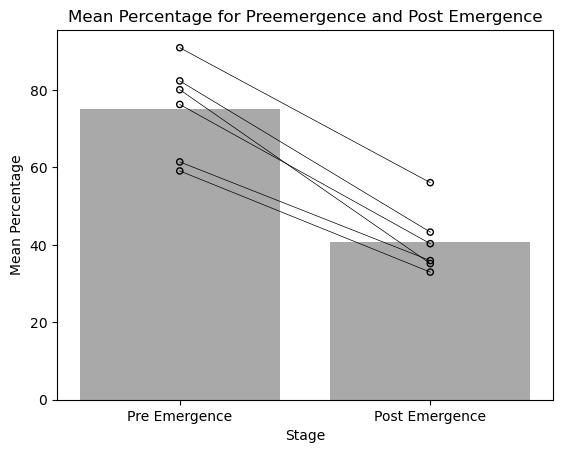

Figure saved to: /zstorage/hera/Light_dark/Analysis/results/plots/All_pre_vs_post_emergence_20231206_172725.png


In [42]:
#Bar graph:

timestamp_now = dt.datetime.now().strftime("%Y%m%d_%H%M%S")
figure_path = f'../results/plots/{experiment_date}_pre_vs_post_emergence_{timestamp_now}.png'

# Plotting the bar graph for mean_preemergence_percentage and mean_post_emergence_percentage
plt.bar(['Pre Emergence', 'Post Emergence'], [mean_preemergence_percentage, mean_postemergence_percentage], color="#A9A9A9")
plt.xlabel('Stage')
plt.ylabel('Mean Percentage')
plt.title('Mean Percentage for Preemergence and Post Emergence')

# Plotting the data points for each run on top of the bar plot
for index, row in merged_df.iterrows():
    plt.scatter(['Pre Emergence', 'Post Emergence'], [row['preemergence_perc_ave'], row['post_emergence_perc_ave']], facecolors='none', edgecolors='black', s=20, zorder=2)

    # Connect the scatter dot pairs from the same run with lines
    plt.plot([0, 1], [row['preemergence_perc_ave'], row['post_emergence_perc_ave']], c='black', linestyle='-', linewidth=0.5, zorder=1)

# Save the figure
plt.savefig(figure_path)

# Show the plot
plt.show()

print('Figure saved to:', os.path.abspath(figure_path))

In [ ]:
from scipy.stats import wilcoxon

# Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(merged_df['preemergence_perc_ave'], merged_df['post_emergence_perc_ave'])

# Check if the p-value is below the chosen significance level (e.g., 0.05)
if p_value < 0.05:
    print("There is a statistically significant difference between pre-emergence and post-emergence percentages.")
else:
    print("There is no statistically significant difference between pre-emergence and post-emergence percentages.")

There is a statistically significant difference between pre-emergence and post-emergence percentages.


In [ ]:
p_value

0.03125

#### Night vs day post emergence 

In [ ]:
night_subset

,dpf,day_period,dark_one,light_one,outside,total,percentage,run,day_night
59,9,1,168,657,830,825,20.363636,20230417_oldbox,night
60,9,2,182,626,807,808,22.524752,20230417_oldbox,night
61,9,3,165,671,834,836,19.736842,20230417_oldbox,night
62,9,4,446,373,865,819,54.456654,20230417_oldbox,night
63,9,5,552,269,822,821,67.235079,20230417_oldbox,night
...,...,...,...,...,...,...,...,...,...
670,10,20,452,634,1398,1086,41.620626,20230622_topbox,night
671,10,21,728,362,1386,1090,66.788991,20230622_topbox,night
672,10,22,1052,53,1377,1105,95.203620,20230622_topbox,night
673,10,23,1062,38,1375,1100,96.545455,20230622_topbox,night


In [ ]:
# Filter the day post emergence data
day_subset = one_df[(one_df['day_night'] == 'day') & (one_df['dpf'].isin([9, 10]))]
day_aveperc_by_run = day_subset.groupby('run')['percentage'].mean().reset_index()
day_aveperc_by_run.columns = ['run', 'day_ave']

# Filter the night post emergence data
night_subset = one_df[(one_df['day_night'] == 'night') & (one_df['dpf'].isin([9, 10]))]
night_aveperc_by_run = night_subset.groupby('run')['percentage'].mean().reset_index()
night_aveperc_by_run.columns = ['run', 'night_ave']

# Merge the two DataFrames on the 'run' column
merged_df = pd.merge(day_aveperc_by_run, night_aveperc_by_run, on='run', how='outer')

# Display the merged DataFrame
print(merged_df)

                  run    day_ave  night_ave
0     20230417_oldbox  32.972076  68.215383
1  20230514_bottombox  35.944122  79.728587
2     20230514_topbox  35.180035  24.070844
3  20230529_bottombox  40.323044  68.230511
4     20230529_topbox  56.083182  89.382087
5     20230622_topbox  43.304667  86.304591


In [ ]:
mean_day_percentage = merged_df['day_ave'].mean()
mean_night_percentage = merged_df['night_ave'].mean()

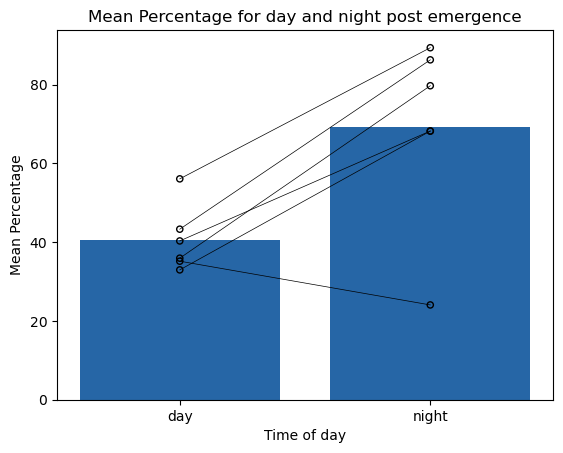

Figure saved to: /zstorage/hera/Light_dark/Analysis/results/plots/All_day_vs_night_20230720_194125.png


In [ ]:
timestamp_now = dt.datetime.now().strftime("%Y%m%d_%H%M%S")
figure_path = f'../results/plots/{experiment_date}_day_vs_night_{timestamp_now}.png'

# Plotting the bar graph for mean_preemergence_percentage and mean_post_emergence_percentage
plt.bar(['day', 'night'], [mean_day_percentage, mean_night_percentage], color="#2666A6")
plt.xlabel('Time of day')
plt.ylabel('Mean Percentage')
plt.title('Mean Percentage for day and night post emergence')

# Plotting the data points for each run on top of the bar plot
for index, row in merged_df.iterrows():
    plt.scatter(['day', 'night'], [row['day_ave'], row['night_ave']], facecolors='none', edgecolors='black', s=20, zorder=2)

    # Connect the scatter dot pairs from the same run with lines
    plt.plot([0, 1], [row['day_ave'], row['night_ave']], c='black', linestyle='-', linewidth=0.5, zorder=1)

# Show the plot
plt.show()

print('Figure saved to:', os.path.abspath(figure_path))

In [ ]:
# Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(merged_df['day_ave'], merged_df['night_ave'])

# Check if the p-value is below the chosen significance level (e.g., 0.05)
if p_value < 0.05:
    print("There is a statistically significant difference between pre-emergence and post-emergence percentages.")
else:
    print("There is no statistically significant difference between pre-emergence and post-emergence percentages.")

There is no statistically significant difference between pre-emergence and post-emergence percentages.


In [ ]:
p_value

0.0625

#### Main Plot